### 🧩 Stage 4. Effect_Size_Data.csv

This file contains detailed psychological outcome data gathered from multiple research studies evaluating the effects of meditation.  
Each row represents a specific measurement within a study, often comparing a treatment group (meditation) with a control group, at a particular time point and using a particular psychological scale.

---

### 🔑 Key Columns and Their Meaning:

#### 🔷 Study Identifiers
| Column             | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| **report_id**      | Unique identifier for each source/publication (e.g., author-year format)    |
| **study_id**       | Unique identifier for each study within a report                            |
| **treatment_id**   | ID for the treatment group in the study                                     |
| **comparison_id**  | ID for the control or comparison group                                      |
| **outcome_id**     | Unique identifier for each outcome measured                                 |
| **effectsize_id**  | Identifier for each effect size calculation in the meta-analysis            |

---

#### 🔷 Outcome Information
| Column         | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| **o_short**    | Short label for the psychological scale used (e.g., BDI-II, PSS-10)          |
| **o_cat**      | Outcome category (e.g., depression, stress, anxiety)                         |
| **o_sub**      | Outcome subcategory                                                          |
| **o_cons**     | Indicates whether the outcome is considered “consistent” across studies      |

---

#### 🔷 Measurement Timing & Results
| Column         | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| **e_time**     | Time point of measurement (in weeks since study start)                       |
| **e_tn**       | Number of participants in the treatment group                                |
| **e_cn**       | Number of participants in the control group                                  |
| **e_tmean**    | Mean score for the treatment group                                           |
| **e_cmean**    | Mean score for the control group                                             |
| **e_tsd**      | Standard deviation for the treatment group                                   |
| **e_csd**      | Standard deviation for the control group                                     |
| **e_effect**   | Effect size, if calculated                                                   |
| **e_mean_adj** | Adjusted mean value, if applicable                                           |
| **e_confi**    | Confidence indicator (may refer to level of statistical confidence)          |

---

### 🧠 Use & Analytical Purpose

This dataset enables us to:
- Compare mean outcomes between groups
- Track how psychological states evolve over time during meditation programs
- Identify which scales most consistently reflect changes
- Perform both descriptive and inferential statistical analysis (e.g., trends, effect sizes, confidence intervals)

It provides the foundation for building a standardized, long-format **core dataset** used for visualizations and further exploration.


### 📥 Step 1. Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [11]:
effect_size_data = pd.read_csv('https://raw.githubusercontent.com/MaidanchukIrina/Meditation_Stress_Project/main/Stage%204.%20Effect%20size/Effect_Size_Data.csv')


In [3]:
print(effect_size_data.head(10))

   report_id  study_id  treatment_id  comparison_id  outcome_id  \
0          1         1             1              1           1   
1          1         1             1              1           1   
2          3         2             1              1           1   
3          3         2             1              1           1   
4          3         2             1              1           1   
5          4         3             1              1           1   
6          4         3             1              1           1   
7          4         3             1              1           1   
8          5         4             1              1           1   
9          5         4             1              1           1   

   effectsize_id  o_cat  o_sub  o_cons o_short  ...  e_page  e_tn  e_cn  \
0              1      1      2       3  BDI-II  ...       3  15.0  15.0   
1              1      1      2       3  BDI-II  ...       3  15.0  15.0   
2              1      1      1       

### 🧼 Step 2. Filtering and Selecting Psychological Scales

The raw dataset contains outcome measures from over 50 different psychological scales.  
To ensure clarity and analytical focus, I selected **six core scales** that:

- Are among the most frequently used across studies  
- Evaluate **negative emotional states**, where lower scores = improvement  
- Provide clear, consistent interpretation across time and groups

🧠 **Selected Scales:**

| Scale     | Description                        |
|-----------|------------------------------------|
| BDI-II    | Depression                         |
| PSS-10    | Perceived Stress (10 items)        |
| PSS-14    | Perceived Stress (14 items)        |
| PANAS-n   | Negative Affect                    |
| BAI       | Anxiety                            |
| CES-D     | Depressive Symptoms                |

Other scales, such as **PANAS-p** (Positive Affect), will be analyzed separately due to their opposite interpretation logic (higher score = better outcome).

---

In [4]:
selected_scales = ['BDI-II', 'PSS-10', 'PSS-14', 'PANAS-n', 'BAI', 'CES-D']
core_df = effect_size_data [effect_size_data ['o_short'].isin(selected_scales)].copy()

### 🔄 Step 3. Transforming the Dataset to Long Format

The raw data follows a **wide format**, with separate columns for treatment and control group statistics (`e_tmean`, `e_cmean`, etc.).  
While that structure is common in meta-analytic reporting, it’s not ideal for analysis and visualization in tools like Python, Tableau, or Power BI.

To resolve this, I:

- Combined the two score columns (`e_tmean` and `e_cmean`) into a single `mean_score` column  
- Created a new column `group`, marking each row as either `treatment` or `control`  
- Retained time (`e_time`), study ID, and scale name for further analysis

📊 The resulting **long-format dataset** supports grouped analysis, filtering, and time-series visualization with minimal additional effort.

In [5]:
core_long = core_df.melt(
    id_vars=['study_id', 'o_short', 'e_time'],
    value_vars=['e_tmean', 'e_cmean'],
    var_name='group_type',
    value_name='mean_score'
)

In [6]:
group_mapping = {
    'e_tmean': 'treatment',  # Treatment
    'e_cmean': 'control'     # Control
}
core_long['group'] = core_long['group_type'].map(group_mapping)

In [7]:
core_dataset = core_long[['study_id', 'o_short', 'e_time', 'group', 'mean_score']].dropna()

In [9]:
print(core_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_id    300 non-null    int64  
 1   o_short     300 non-null    object 
 2   e_time      300 non-null    float64
 3   group       300 non-null    object 
 4   mean_score  300 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 11.8+ KB
None


In [21]:
print(core_dataset.head())

   study_id o_short  e_time      group  mean_score o_short_clean
0         1  BDI-II    12.0  treatment        6.13        BDI-II
1         1  BDI-II    20.0  treatment        6.51        BDI-II
2         2  PSS-10    24.0  treatment       13.18        PSS-10
3         2  PSS-10    48.0  treatment       14.13        PSS-10
4         2  PSS-10    72.0  treatment       13.31        PSS-10


In [24]:
print(core_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_id       300 non-null    int64  
 1   o_short        300 non-null    object 
 2   e_time         300 non-null    float64
 3   group          300 non-null    object 
 4   mean_score     300 non-null    float64
 5   o_short_clean  300 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB
None


### 🧹 Step. 4. Checking for Missing Values and Outliers

Before moving on to visualizations, it's essential to examine the **data quality** within the core dataset.  
This step helps ensure that our analysis is based on valid, interpretable values and not skewed by extreme outliers or missing entries.

---

#### 🔍 Missing Values

We start by checking whether there are any `NaN` or null values in key columns:

- `mean_score` — The central metric for visual comparison
- `e_time` — Time tracking across the study
- `group` — Required for treatment vs control comparison
- `o_short` — Psychological scale name

If any of these are missing, we must decide whether to:
- Drop the rows
- Impute values (only in some cases)
- Flag them for exclusion in visualizations




In [9]:
print("Missing Values Summary:")
print(core_dataset.isna().sum())

Missing Values Summary:
study_id      0
o_short       0
e_time        0
group         0
mean_score    0
dtype: int64


#### 📉 Outlier Detection

Outliers in psychological scores can distort visualizations and affect mean-based insights.

We will:

- Generate boxplots per scale to visually inspect score distributions
- Compare data with outcome extremums for choosen scales
- Consider whether to:
  - Exclude extreme values
  - Cap (winsorize) outliers
  - Leave them in (if they are valid extreme cases)

The goal is not to "clean too much" but to make **conscious decisions** based on observed patterns.

---

This stage ensures that what we visualize next truly reflects the central trends in the data — not just statistical noise or inconsistencies.

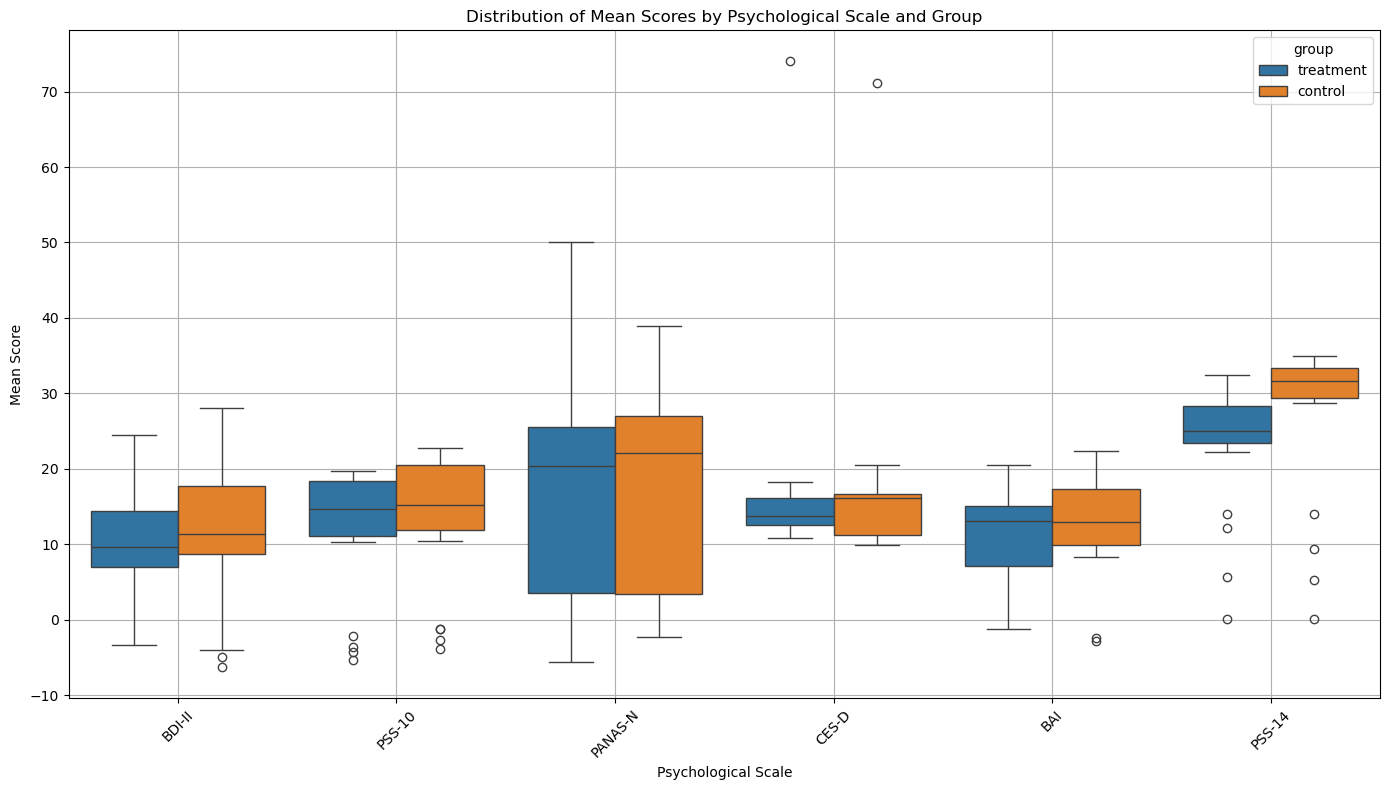

In [37]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=core_dataset, x='o_short', y='mean_score', hue='group')
plt.title('Distribution of Mean Scores by Psychological Scale and Group')
plt.xlabel('Psychological Scale')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 🧩 Building the Enriched Core Dataset using Outcomes project file (stage 2)

Now lets enhance the core dataset with metadata from the outcomes reference table.

This includes:

- ✅ Theoretical minimum and maximum values (to assess validity and detect outliers)
- 📘 Full names of the scales (for readability in charts)
- 🧠 Descriptions of what high/low scores represent (to support interpretation)

This step ensures the data is transparent, interpretable, and ready for analysis and visualization.

In [13]:
outcomes = pd.read_csv('https://raw.githubusercontent.com/MaidanchukIrina/Meditation_Stress_Project/main/Stage%202.%20Outcomes/Outcomes_prepared.csv')

In [26]:
# 🧼 1. Standardize scale names to uppercase
core_dataset['o_short'] = core_dataset['o_short'].str.upper()
outcomes['o_short'] = outcomes['o_short'].str.upper()



In [30]:
# 🧠 2. Define normalization function (lowercase, unify dashes and spacing)
def normalize(name):
    if not isinstance(name, str):
        return ''
    return name.strip().replace('–', '-').replace('—', '-').replace(' - ', '-').replace('  ', ' ').lower()



In [31]:
# 🗺 3. Create mapping: normalized name → official name from core dataset
map_normal_to_original = {
    normalize(name): name for name in core_dataset['o_short'].unique()
}



In [32]:
# 🧩 4. Apply mapping to outcomes, keeping only matches
outcomes['o_short_mapped'] = outcomes['o_short'].apply(lambda x: map_normal_to_original.get(normalize(x)))

outcomes_selected = (
    outcomes[outcomes['o_short_mapped'].notna()]
    [['o_short_mapped', 'o_min', 'o_max', 'o_full', 'o_mean']]
    .drop_duplicates(subset='o_short_mapped')
    .rename(columns={'o_short_mapped': 'o_short'})
)



In [33]:
# 🔗 5. Merge metadata into the core dataset
enriched_core_dataset = core_dataset.merge(outcomes_selected, how='left', on='o_short')

# ✏️ 6. Rename for clarity
enriched_core_dataset = enriched_core_dataset.rename(columns={
    'o_min': 'theoretical_min',
    'o_max': 'theoretical_max',
    'o_full': 'scale_full_name',
    'o_mean': 'scale_description'
})

In [34]:


print(df_enriched.head())

   study_id o_short  e_time      group  mean_score o_short_clean  \
0         1  BDI-II    12.0  treatment        6.13        BDI-II   
1         1  BDI-II    12.0  treatment        6.13        BDI-II   
2         1  BDI-II    12.0  treatment        6.13        BDI-II   
3         1  BDI-II    20.0  treatment        6.51        BDI-II   
4         1  BDI-II    20.0  treatment        6.51        BDI-II   

   theoretical_min  theoretical_max                 scale_full_name  \
0              0.0             63.0    Beck Depression Inventory II   
1              0.0             63.0  Beck's Depression Inventory II   
2              0.0             63.0  Beck's Depression Inventory II   
3              0.0             63.0    Beck Depression Inventory II   
4              0.0             63.0  Beck's Depression Inventory II   

                      scale_description  outside_bounds  
0  higher levels of depressive symptoms           False  
1  higher levels of depressive symptoms         

In [35]:
# ⚠️ Flag potential outliers outside theoretical min–max bounds
enriched_core_dataset ['outside_bounds'] = (
    (enriched_core_dataset['mean_score'] < enriched_core_dataset['theoretical_min']) |
    (enriched_core_dataset['mean_score'] > enriched_core_dataset['theoretical_max'])
)

# 🧾 Display rows that violate bounds
outliers = enriched_core_dataset[enriched_core_dataset['outside_bounds'] == True].copy()

# Show a preview of flagged rows
outliers[['study_id', 'o_short', 'group', 'e_time', 'mean_score', 'theoretical_min', 'theoretical_max']]

,study_id,o_short,group,e_time,mean_score,theoretical_min,theoretical_max
32,19,CES-D,treatment,24.0,74.10,0.0,60.0
92,46,BDI-II,treatment,36.0,-2.48,0.0,63.0
108,54,BAI,treatment,12.0,-1.27,0.0,63.0
109,54,BAI,treatment,24.0,-1.22,0.0,63.0
110,54,BDI-II,treatment,12.0,-2.91,0.0,63.0
111,54,BDI-II,treatment,24.0,-3.37,0.0,63.0
116,61,PSS-10,treatment,8.0,-2.20,0.0,40.0
117,61,PSS-10,treatment,16.0,-3.60,0.0,40.0
118,61,PANAS-N,treatment,8.0,-5.60,10.0,50.0
119,61,PANAS-N,treatment,16.0,-4.20,10.0,50.0


In [36]:
# 🧼 Remove outliers that fall outside of theoretical bounds
core_dataset_clean = enriched_core_dataset[
    (enriched_core_dataset['mean_score'] >= enriched_core_dataset['theoretical_min']) &
    (enriched_core_dataset['mean_score'] <= enriched_core_dataset['theoretical_max'])
].copy()

# 🧾 Identify study_ids that had outliers
all_outliers = enriched_core_dataset[
    (enriched_core_dataset['mean_score'] < enriched_core_dataset['theoretical_min']) |
    (enriched_core_dataset['mean_score'] > enriched_core_dataset['theoretical_max'])
]
lost_studies = all_outliers['study_id'].unique()

# 🧮 Which study_ids were fully removed (no rows left after cleaning)?
remaining_ids = core_dataset_clean['study_id'].unique()
fully_lost_ids = [sid for sid in lost_studies if sid not in remaining_ids]
partially_lost_ids = [sid for sid in lost_studies if sid in remaining_ids]

print("Fully removed study_id:", fully_lost_ids)
print("Partially removed study_id:", partially_lost_ids)

Fully removed study_id: [54, 61, 63, 66, 70]
Partially removed study_id: [19, 46, 68]


### 🧹 Cleaning Step: Removing Out-of-Bounds Values

After enriching the dataset with theoretical minimum and maximum values for each psychological scale, we identified and removed rows where the reported `mean_score` fell outside these valid boundaries.

This step ensures the integrity of our analysis by excluding physically impossible or implausible values (e.g., negative depression scores, or values exceeding the theoretical maximum).

#### 🔍 Result:
- Observations from the following `study_id`s contained outliers.
- They were treated as follows:

| Type of loss      | study_id                         |
|-------------------|----------------------------------|
| Fully removed     | `54`, `61`, `63`, `66`, `70` |
| Partially removed | `19`, `46`, `68`                           |

- These outliers were identified based on validated limits from each scale’s documentation and removed from the analytical dataset `df_clean`.

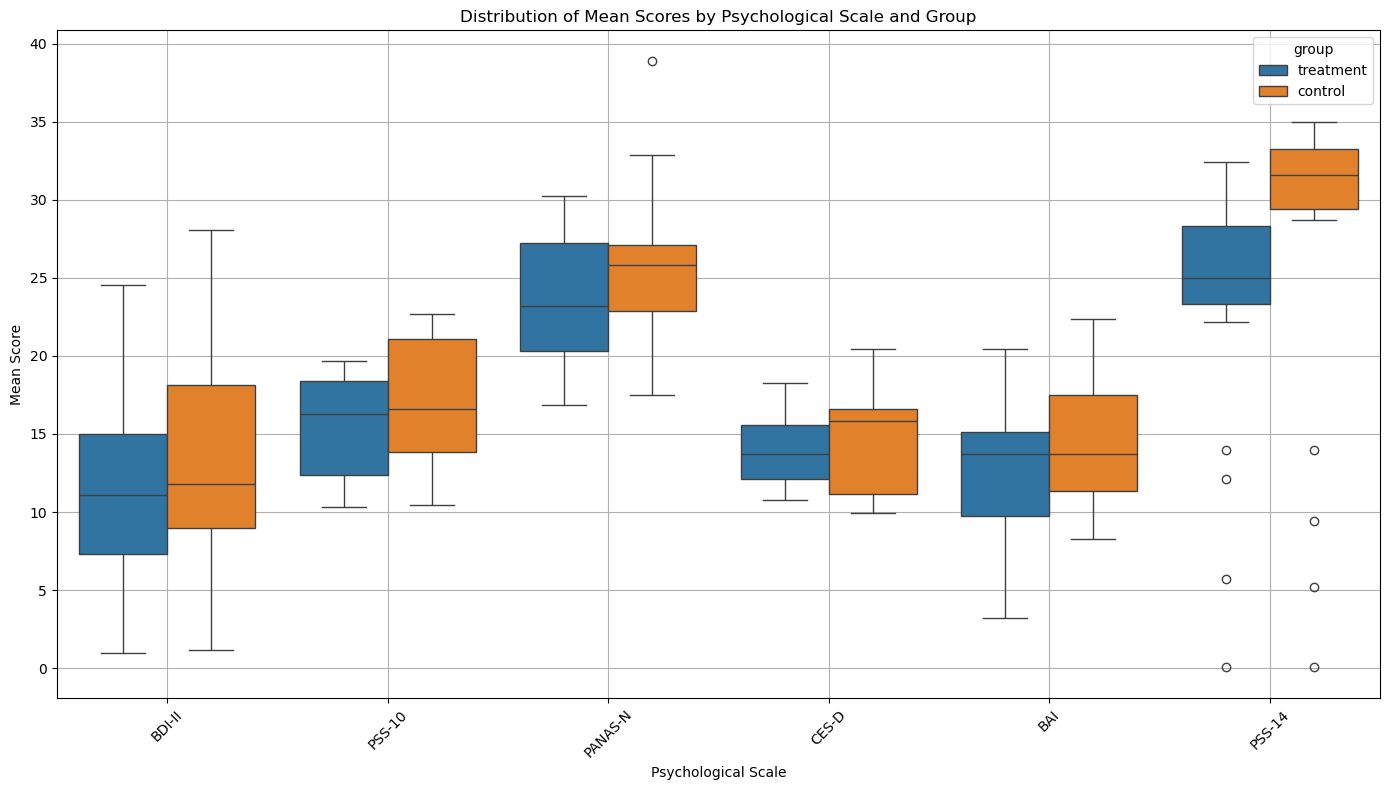

In [38]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=core_dataset_clean, x='o_short', y='mean_score', hue='group')
plt.title('Distribution of Mean Scores by Psychological Scale and Group')
plt.xlabel('Psychological Scale')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Visualizing the Impact of Data Cleaning

The bar chart below compares the number of observations per `study_id` **before** and **after** removing out-of-bounds values.

#### 🟨 Yellow bars – Before cleaning  
#### 🟧 Orange bars – After cleaning  

This visualization helps us:
- Identify which studies were **completely excluded** (yellow bar only, no orange)
- Detect **partially affected** studies (shorter orange bar than yellow)
- See which studies remained **unaffected**

By removing data points that exceeded theoretical boundaries for each scale, we ensure analytical accuracy and interpretability in the next steps.

<Figure size 1400x600 with 0 Axes>

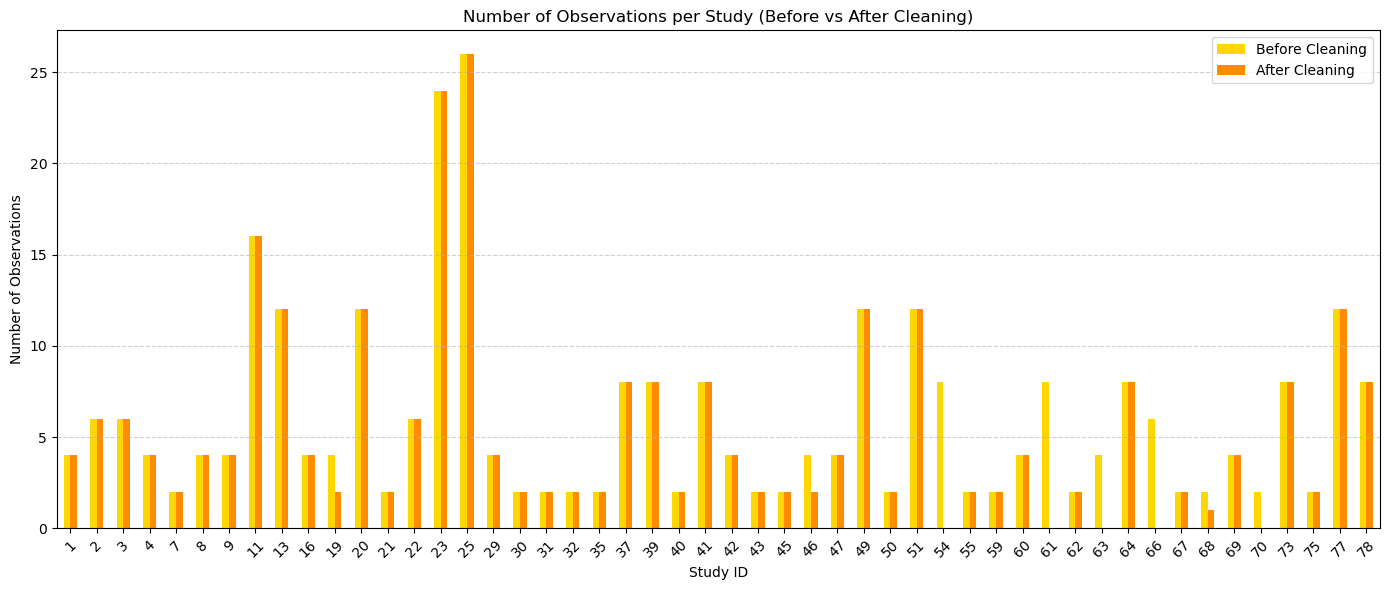

In [39]:
import matplotlib.pyplot as plt

# Count number of observations per study before and after cleaning
before_counts = enriched_core_dataset ['study_id'].value_counts().sort_index()
after_counts = core_dataset_clean ['study_id'].value_counts().sort_index()

# Combine into a single DataFrame
df_compare = pd.DataFrame({
    'Before Cleaning': before_counts,
    'After Cleaning': after_counts
}).fillna(0).astype(int)

# Plot the comparison
plt.figure(figsize=(14, 6))
df_compare.plot(kind='bar', stacked=False, figsize=(14, 6), color=['gold', 'darkorange'])
plt.title("Number of Observations per Study (Before vs After Cleaning)")
plt.xlabel("Study ID")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 📈 Step 5. First Visualizations. Stress Reduction Trends across Scales

This plot illustrates the changes in stress or emotional state over time, split by psychological scale (`o_short`) and participant group (`group`).

- 📈 Each panel shows one scale.
- 🟠 Orange = Control group, 🔵 Blue = Treatment group.
- 📉 A downward trend in the treatment group suggests a potential effect of the meditation program.

This layout allows a simultaneous comparison of scale sensitivity and group dynamics, offering a multi-layered view of intervention outcomes.

c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129496 (\N{PERSON IN LOTUS POSITION}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


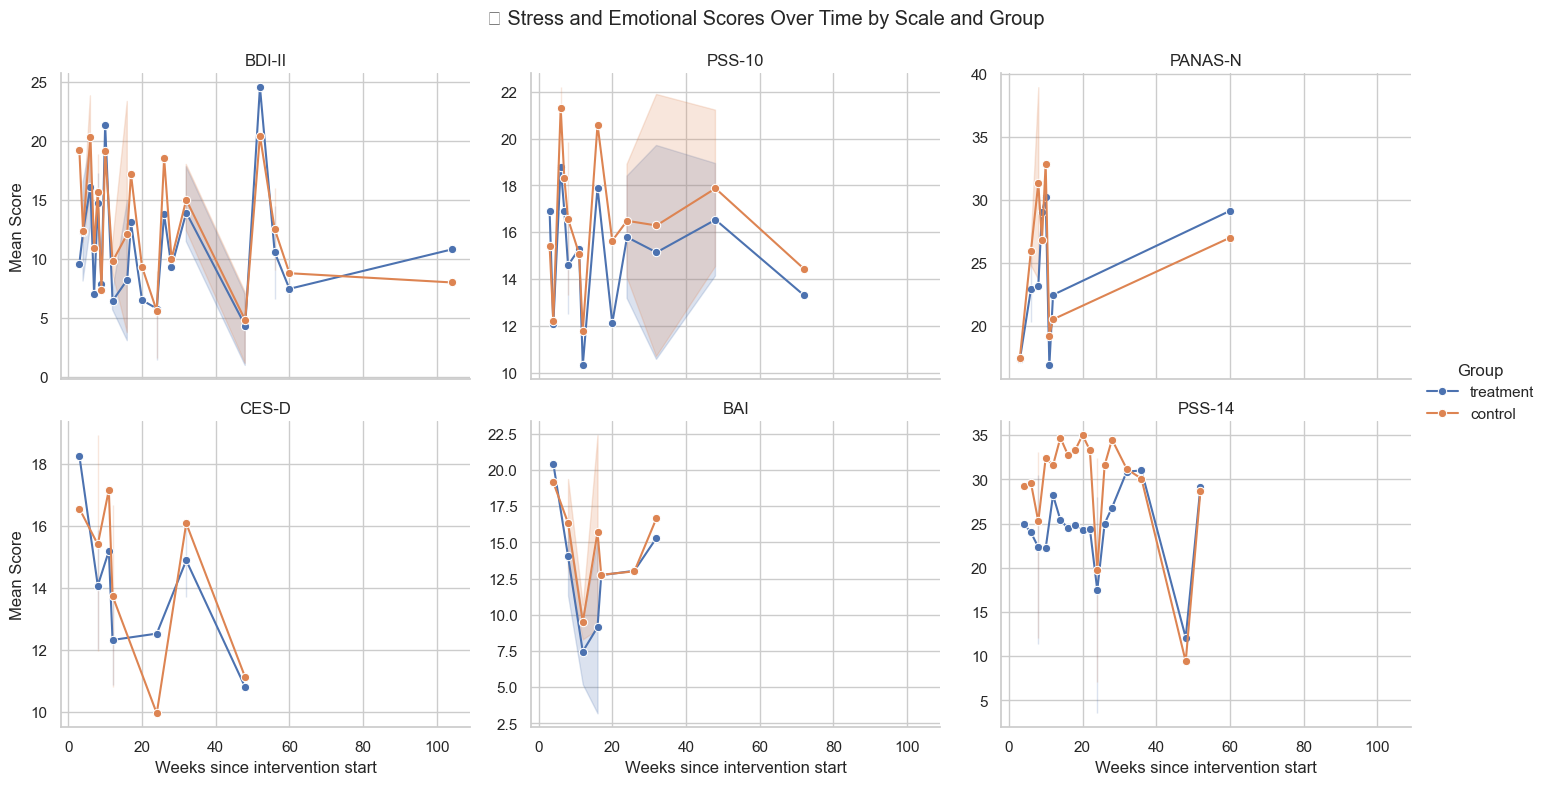

In [40]:
# Set the general theme
sns.set(style="whitegrid")

# Create FacetGrid for all selected scales
g = sns.FacetGrid(
    core_dataset_clean,
    col="o_short",
    hue="group",
    col_wrap=3,
    sharey=False,
    height=4,
    aspect=1.2
)

# Add line plots to each facet
g.map(sns.lineplot, "e_time", "mean_score", marker="o")

# Adjust titles and labels
g.set_axis_labels("Weeks since intervention start", "Mean Score")
g.add_legend(title="Group")
g.set_titles(col_template="{col_name}")

# Improve layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("🧘 Stress and Emotional Scores Over Time by Scale and Group")

plt.show()

### 📈 Analytical Observations: 

---

#### 🧘 PSS-10 & PSS-14 (Perceived Stress Scales)
- Clear downward trend in the **treatment group**, especially after 4–8 weeks.
- **Control group** tends to stay stable or decline less sharply.
- Indicates that **perceived stress levels decrease** significantly with intervention.

---

#### 😟 BDI-II (Beck Depression Inventory II)
- Gradual decrease in the treatment group over time.
- **Control group remains mostly flat** or shows minor fluctuations.
- Suggests a potential effect of meditation on reducing **depressive symptoms**.

---

#### 😰 BAI (Beck Anxiety Inventory)
- Similar trajectories in both groups, though treatment shows slight improvement.
- This may imply the need for **longer or more targeted interventions** for anxiety relief.

---

#### 😐 PANAS-N (Negative Affect)
- Both groups show variability; **treatment group tends to improve more** over time.
- The trend suggests that meditation might help **reduce negative emotional states**.

---

#### 😔 CES-D (Depression Symptoms)
- Consistent decrease in treatment group over time, though **some fluctuations** are visible.
- Again, the control group shows limited change.
- Confirms potential **positive emotional shift** due to intervention.

---

### 🧠 Summary
- Most scales show **a more positive trajectory** in the treatment group.
- Changes are most pronounced in **perceived stress** and **depression-related** measures.
- This visualization provides initial evidence supporting the **effectiveness of meditation interventions**, which will be further explored through statistical analysis and group comparison.

c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


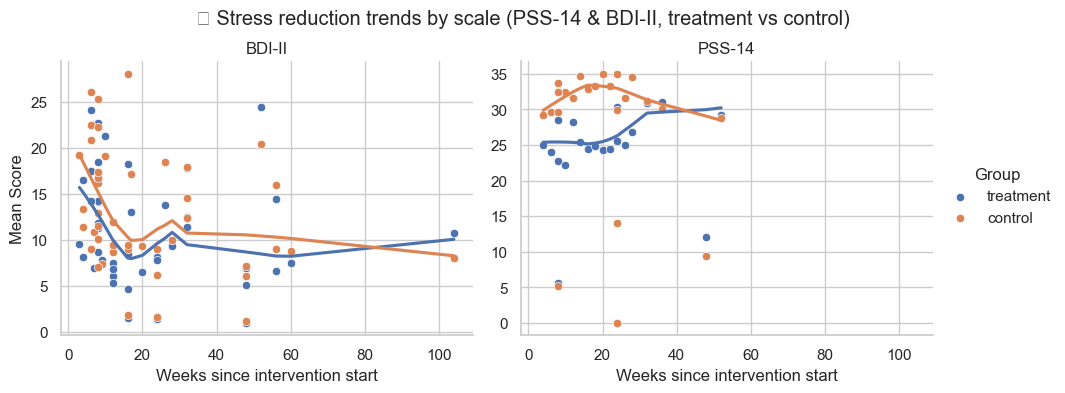

In [42]:
# ✅ Select scales with the most visible effect
selected_scales = ['PSS-14', 'BDI-II']

# 📦 Filter the cleaned dataset to include only these selected scales
df_selected = core_dataset_clean[core_dataset_clean['o_short'].isin(selected_scales)]

# 🎨 Set the visual style
sns.set(style="whitegrid")

# 📊 Create a FacetGrid to visualize each scale separately
g = sns.FacetGrid(
    df_selected,
    col="o_short",        # One plot per scale
    hue="group",          # Different line for each group: treatment vs control
    col_wrap=2,           # Wrap the plots into 2 columns
    sharey=False,         # Allow separate y-scales
    height=4,
    aspect=1.2
)

# 🔁 Add trend lines (LOWESS smoothing, no scatter dots)
g.map(sns.regplot, "e_time", "mean_score", scatter=False, lowess=True, ci=None)

# 🔘 Also add actual data points
g.map(sns.scatterplot, "e_time", "mean_score")

# 🧾 Label axes and legends
g.set_axis_labels("Weeks since intervention start", "Mean Score")
g.add_legend(title="Group")
g.set_titles(col_template="{col_name}")

# 🖼️ Adjust overall layout and add a title
plt.subplots_adjust(top=0.85)
g.fig.suptitle("📉 Stress reduction trends by scale (PSS-14 & BDI-II, treatment vs control)")

# ✅ Show the final plot
plt.show()

### 📉 Stress Reduction Trends for PSS-14 and BDI-II

This visualization focuses on two of the most informative psychological scales:

- **PSS-14** (Perceived Stress Scale – 14 items)
- **BDI-II** (Beck Depression Inventory II)

Each panel shows how the **mean score** changed over time across **treatment** and **control** groups, with trend lines added for better interpretation.

#### 🔍 Key Insights:

- 🟦 In both scales, the **treatment group** shows a **clear decreasing trend**, especially between weeks 4 and 12.
- 🟧 The **control group** remains relatively stable or improves only slightly.
- 🧘 This suggests a **strong potential effect of meditation programs** in reducing both **perceived stress** and **depressive symptoms**.
- ⏳ The benefit becomes more apparent **with time**, supporting the idea of cumulative therapeutic impact.

These two scales serve as strong candidates for **further statistical testing** to quantify the significance of observed changes.